<a href="https://colab.research.google.com/github/Atsu-fuji/2ch_Model_indexes/blob/main/2ch_Model_indexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 「2ちゃんねるモデル」の指標算出と先行研究の再現

## 伊藤昌亮（2005）における「吉野家祭り」スレッドを例に

- 17スレッド16,974件のメッセージが対象

うち、11スレッドのメッセージ（11,000件）は「過去ログ」から取得し、5スレッドのメッセージ（5,974件）は「過去ログ保管所」（
http://php.adam.ne.jp/thread.html
）よりURL収集

※ Waybackmachineによりアーカイブされたページを参照
https://web.archive.org/web/20030203222808/http://php.adam.ne.jp/thread.html

- 伊藤（2005）が分析対象とした18スレッド（17,993件）のうち、1スレッドは上述の方法で復元できなかった。

- そのため、1019件のメッセージは本稿では用いていない。


## データの読み込み

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PythonData/yoshinoya_raw16974.csv', encoding = 'utf-8', index_col=0)

In [ ]:
df

,thread_id,res_num,date,name,comment
0,0,1,02/10/07,名無しさん？,次っていつやるの？
1,0,2,02/10/07,名無しさん？,NaN
2,0,3,02/10/07,名無しさん？,NaN
3,0,4,02/10/07,（・ｖ・）,（・ｖ・）やらない（・ｘ・）うんう
4,0,5,02/10/07,君に胸キュン♪,食傷気味
...,...,...,...,...,...
16969,16,996,02/12/31,6軒ハシゴ,1000!!
16970,16,997,02/12/31,名無しさん？,おし1000だな
16971,16,998,02/12/31,名無しさん？,1000
16972,16,999,02/12/31,名無しさん？,1000？（・∀・）


## Activity, Speedの算出

- **Activity**は同一idの行数の合計を算出することにより得る。

In [ ]:
for i in range(17):
    df_sep = df[df["thread_id"]==i]
    print("thread_id =",i, len(df_sep))

thread_id = 0 974
thread_id = 1 1000
thread_id = 2 1000
thread_id = 3 1000
thread_id = 4 1000
thread_id = 5 1000
thread_id = 6 1000
thread_id = 7 1000
thread_id = 8 1000
thread_id = 9 1000
thread_id = 10 1000
thread_id = 11 1000
thread_id = 12 1000
thread_id = 13 1000
thread_id = 14 1000
thread_id = 15 1000
thread_id = 16 1000


- **Speed**は、各スレッドの最初の書き込みと最後の書き込みの年月日の差をとり、その値でActivityを除することで得る。

ただし、生のデータそのままでは日付計算が行えないので、表記を統一するなど調整を行ってから計算する。

幸い、「吉野家祭り」スレッドのデータは、伊藤（2005）にスレッドの開始日時についての情報があるため、実際に取得したデータと照らし合わせて誤りがないかを確認したうえで、これを用いてSpeedを算出した。

## テンプレートの抽出・除外

「吉野家祭り」スレッドには、各スレッドの冒頭（1）のみが「テンプレート」となっている。

「テンプレート」は、2ちゃんねるの辞典『2典 第3版』に項目があるように、それ自体が2ちゃんねるを特徴づける書き込み内容である。つまり、アスキーアートや他の2ちゃんねる語と同様に、議論発散傾向の指標に該当する要素である。

その一方で、伊藤（2016）において示されているように、スレッドの進行を方向づけたり、スレッドに特定の性質を付与したりする機能がある。つまり、そのスレッドの内容を規定するものであり、その点で議論を収束させている可能性がある。

このように、「テンプレート」は議論発散傾向の指標である2ちゃんねるらしさの要素であると同時に、議論収束傾向を促進させうるという二面性をもつ。

したがって、スレッドの議論の傾向を見る際には、これらの「テンプレート」は別途分析の対象として取り扱うのが適切であると思われる。そこで、残りの指標を算出する前に、これらはとり除いておく。

- a. 「開催店リスト」

In [ ]:
df[df['comment'].str.contains('開催店リスト\s', na=False)]

,thread_id,res_num,date,name,comment
5726,5,753,02/12/23,業務系リンク,開催店リスト http://www.geocities.co.jp/MusicStar-V...
5976,6,3,02/12/23,名無しさん＠おどらにゃｿﾝｿﾝ,開催店リスト http://www.geocities.co.jp/MusicStar-V...
6974,7,1,02/12/24,名無しさん＠おどらにゃｿﾝｿﾝ,関連リンク>>1-20 開催店リスト http://www.geocities.co.j...
7974,8,1,02/12/24,名無しさん＠おどらにゃｿﾝｿﾝ,開催店リスト http://www.geocities.co.jp/MusicStar-...
8974,9,1,02/12/24,名無しさん＠おどらにゃｿﾝｿﾝ,開催店リスト http://www.geocities.co.jp/MusicStar-V...
9974,10,1,02/12/24,卍,開催店リスト http://www.geocities.co.jp/MusicStar-V...
10974,11,1,02/12/24,奈々氏,開催店リスト http://www.geocities.co.jp/MusicStar-V...
11346,11,373,02/12/24,名無しさん＠おどらにゃｿﾝｿﾝ,☆実況板の皆様へ謝罪☆ 祭り板で始まりましたこの企画、予想どうりと言うかまたかと言うか ...
11974,12,1,02/12/24,名無しさん＠おどらにゃｿﾝｿﾝ,開催店リスト http://www.geocities.co.jp/MusicStar-V...
12974,13,1,02/12/24,名無しさん＠おどらにゃｿﾝｿﾝ,開催店リスト http://www.geocities.co.jp/MusicStar-V...


In [ ]:
# 「開催店リスト」+空白を含むメッセージを除外する
df1 = df[~df['comment'].str.contains('開催店リスト\s', na=False)]

- b. 「告知」および「ローカルルール」

In [ ]:
df[df['comment'].str.contains('■■■■■■■■■■■■■■■■■■■■■■', na=False)]
# ■■■■■■■■■■■■■■■■■■■■■■

,thread_id,res_num,date,name,comment
226,0,227,02/10/12,吉牛オフ,とりあえず引っ張り出してきて今年向けに直した。■■■■■■■■■■■■■■■■■■■■■■告...
257,0,258,02/10/13,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...
260,0,261,02/10/13,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...
265,0,266,02/10/13,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...
266,0,267,02/10/13,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...
595,0,596,02/10/23,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...
596,0,597,02/10/23,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...
766,0,767,02/10/31,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...
767,0,768,02/10/31,名無しさん？,>>767【本会場】はやめれ。■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が...
785,0,786,02/10/31,名無しさん？,■■■■■■■■■■■■■■■■■■■■■■告知【あの名場面が今年のイブも降臨する】■■■■...


In [ ]:
df2 = df1[~df1['comment'].str.contains('■■■■■■■■■■■■■■■■■■■■■■', na=False)]

In [ ]:
len(df2)

16913

## Nameless, ABONの算出

In [ ]:
df2

,thread_id,res_num,date,name,comment
0,0,1,02/10/07,名無しさん？,次っていつやるの？
1,0,2,02/10/07,名無しさん？,NaN
2,0,3,02/10/07,名無しさん？,NaN
3,0,4,02/10/07,（・ｖ・）,（・ｖ・）やらない（・ｘ・）うんう
4,0,5,02/10/07,君に胸キュン♪,食傷気味
...,...,...,...,...,...
16969,16,996,02/12/31,6軒ハシゴ,1000!!
16970,16,997,02/12/31,名無しさん？,おし1000だな
16971,16,998,02/12/31,名無しさん？,1000
16972,16,999,02/12/31,名無しさん？,1000？（・∀・）


In [ ]:
print(df2['name'].str.contains('名無しさん', na=False).sum())
print(df2['name'].str.contains('あぼーん', na=False).sum())

11552
25


In [ ]:
df2[df2['name'].str.contains('あぼーん', na=False)]

,thread_id,res_num,date,name,comment
3470,3,497,02/12/08,あぼーん,あぼーん
3472,3,499,02/12/08,あぼーん,あぼーん
3474,3,501,02/12/08,あぼーん,あぼーん
3477,3,504,02/12/08,あぼーん,あぼーん
3478,3,505,02/12/08,あぼーん,あぼーん
3486,3,513,02/12/08,あぼーん,あぼーん
3502,3,529,02/12/08,あぼーん,あぼーん
3515,3,542,02/12/08,あぼーん,あぼーん
3523,3,550,02/12/08,あぼーん,あぼーん
3526,3,553,02/12/08,あぼーん,あぼーん


この結果は、伊藤の「議論発散傾向に負の影響を与えるABONも一スレッドを除いて常に最小値の0」であるという結果と同じである（伊藤 2005: 98）。

その一方で、namelessは非常に多いので、スレッドごとに数を集計する。



In [ ]:
# スレッドごとの「名無し」集計
for i in range(17):
    df_sep = df2[df2['thread_id'] == i]
    print(i ,df_sep['name'].str.contains('名無しさん', na=False).sum())

0 681
1 686
2 788
3 704
4 774
5 743
6 753
7 729
8 655
9 713
10 648
11 727
12 562
13 496
14 569
15 671
16 653


## ASCII Artの算出
①「AAリストに合致する文字列」の抽出

②「AAを特徴づける文字」を含む行の抽出（実際はAAを含まない行もある）

In [ ]:
df_top50 = pd.read_csv("/content/drive/MyDrive/PythonData/2chaa_top50.csv", encoding = 'utf-8', index_col=0)
aa_list = list(df_top50['word']) #リスト化

In [ ]:
df_aadic = pd.read_csv("/content/drive/MyDrive/PythonData/2chaadic.csv", encoding = 'utf-8', names=['word'])
aa_dic = list(df_aadic['word']) #リスト化

### ①AA辞典と合致するもののみを取り出して計算し、バイト数を算出する。

In [ ]:
# データ全体でも調べてみる。こちらの方が多く取り出せているなら、最初にこの操作を行う。
df_aa_fromDic1 = pd.DataFrame(columns = ['thread_id','res_num','date','name','comment','aa_match'])
df3 = df2.dropna(subset=["comment"])
#df3["comment"] = df3["comment"].astype(str)
for x in range(len(df3)):
    for i in range(len(aa_dic)):
        if aa_dic[i] in df3.iat[x,4]:
            df_add = df3.iloc[x:x+1]
            df_add['aa_match'] = aa_dic[i]
            df_aa_fromDic1 = df_aa_fromDic1.append(df_add)

In [ ]:
# 重複の削除
df_aa_fromDic1.drop_duplicates(subset=['comment','aa_match'])

,thread_id,res_num,date,name,comment,aa_match
206,0,207,02/10/12,名無しさん？,彼女に振られたから今年のイヴにやろうぜ！！！！｡･ﾟ･(ﾉД`)･ﾟ･｡,｡･ﾟ･(ﾉД`)･ﾟ･｡
206,0,207,02/10/12,名無しさん？,彼女に振られたから今年のイヴにやろうぜ！！！！｡･ﾟ･(ﾉД`)･ﾟ･｡,(ﾉД`)
245,0,246,02/10/13,名無しさん？,今年も参加させてもらいまつ(ﾟ∀ﾟ)たのしみたのしみ,(ﾟ∀ﾟ)
351,0,352,02/10/14,名無しさん？,彼女いない工房がｲｳﾞの21:00に飯食いに行くと親に言うのは恥ずかしい｡･ﾟ･(ﾉД`)･ﾟ･｡,｡･ﾟ･(ﾉД`)･ﾟ･｡
351,0,352,02/10/14,名無しさん？,彼女いない工房がｲｳﾞの21:00に飯食いに行くと親に言うのは恥ずかしい｡･ﾟ･(ﾉД`)･ﾟ･｡,(ﾉД`)
...,...,...,...,...,...,...
16713,16,740,02/12/29,名無しさん？,>>703なんか、後付けの理由っぽさがいいですねそれにしても京阪ジャックって……(((;ﾟД...,(;ﾟДﾟ)
16717,16,744,02/12/29,名無しさん？,大晦日はやるの？やるなら参加(･∀･)ｼﾀｰｲ!!,(･∀･)
16789,16,816,02/12/30,名無し＠京都,言い忘れ。殺伐とね ☆,☆
16816,16,843,02/12/31,804,>>842大丈夫、そんな貴方にカウントダウン殺伐が（笑）て言うか雪かyo～（;´д｀）ちと萎...,（笑）


In [ ]:
# ①のバイト数：df3全体から抽出した一行顔文字のAAのみ

df_aa_fromDic1 = df_aa_fromDic1.drop_duplicates(subset=['comment','aa_match'])

for i in range(17):
    df_sep = df_aa_fromDic1[df_aa_fromDic1['thread_id'] == i]
    aa = df_sep['aa_match']
    txt = ''.join(aa)
    print(i ,len(txt.encode('utf-8'))) # 文字列としてバイト数を計算

0 245
1 600
2 310
3 230
4 548
5 504
6 465
7 540
8 441
9 438
10 937
11 1445
12 1154
13 842
14 379
15 253
16 329


In [ ]:
# 重複をとり除いた出現AAリストを作成 --> Vocabularyの算出時に必要
df_word = df_aa_fromDic1['aa_match'].drop_duplicates().values.tolist() # 重複する要素をとり除いてリスト化

### ②AAを特徴づける文字を抽出してバイト数を算出する

In [ ]:
# aa_dic由来のAAを削除
# df3のコメント（Series）をcommentsリストへ
comments = df3['comment'].values.tolist()

# commentsリストの各要素に対し、aa_dicリスト以外の文字列を抽出して別のリスト'comment_cleaned_1'として出力
comment_cleaned_1 = []
for x in comments:
    for i in range(len(aa_dic)):
        if aa_dic[i] in x:
            x = x.replace(''.join(aa_dic[i]), '')
    comment_cleaned_1.append(x)

# comment_cleaned_1を新しいcommentとして上書き
df3['comment'] = comment_cleaned_1

In [ ]:
# df3['comment']に「AAを特徴づける文字トップ50」を含む行を抽出
df_aa_count = pd.DataFrame(columns = ['thread_id','res_num','date','name','comment'])
for i in range(len(aa_list)):
    df_add = df3[df3['comment'].str.contains("".join(aa_list[i]), regex=False)]
    df_aa_count = df_aa_count.append(df_add)
df_aa_count = df_aa_count[~df_aa_count.duplicated()] # 重複している行を削除
df_aa_sorted = df_aa_count.sort_index() # indexで昇順ソート

In [ ]:
df_aa_sorted

,thread_id,res_num,date,name,comment
18,0,19,02/10/07,名無しさん？,前回参加した奴は参加してない人にも解るようにここに感想書いて漏れは最後に「もうこねぇーよｳﾜ...
29,0,30,02/10/07,名無しさん？,http://www2.mnx.jp/carvancle/yoshigyu/negidaku...
51,0,52,02/10/07,名無しさん？,次回はひろゆきの誕生日じゃないよ。どうせなら一周年（１２月２４日）まで待て。最高の祭りになる...
57,0,58,02/10/07,agex,>>50-51ｻﾝｸｽラウンジだけでやってもあんまり人来ないよね？
58,0,59,02/10/07,名無しさん？,今実施中の無料５０杯券を２０枚集めて「千杯ＯＦＦ」実施ｷﾎﾞﾝﾇ
...,...,...,...,...,...
15943,15,970,02/12/26,名無しさん＠おどらにゃｿﾝｿﾝ,>>968 うまｲｲ!! かなりﾜﾛﾀ
15947,15,974,02/12/26,卍,>>968 ﾜﾛﾀ >>973 http://www53.tok2.com/hom...
15949,15,976,02/12/26,名無しさん＠おどらにゃｿﾝｿﾝ,>>975 いいこというな。。。 その通りだよ。 咳払いも殺伐感薄れるからな。 ...
15950,15,977,02/12/26,6軒ハシゴ,http://www19.cds.ne.jp/~hpychild/2ch/upload/i...


この状態のままでは、AA以外の要素も多数含んでいるので、以下の要素を抽出し順次とり除いていく

In [ ]:
# 抽出①：'http'から始まるもの
import re

df_url_1 =df3['comment'].to_list()
url_1 = re.findall(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+\s*?',str(df_url_1)) # https?://([\w-]+\.)+[\w-]+(/[\w-./?%&=]*)?
url_cleaned_1 = []
for x in df_url_1:
    z = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+\s*?','',x)
    url_cleaned_1.append(z)

In [ ]:
url_1

In [ ]:
# 抽出②：'ttp'から始まるもの
import re

url_2 = re.findall(r'ttps?://[\w/:%#\$&\?\(\)~\.=\+\-]+\s*?',str(url_cleaned_1))
url_cleaned_2 = []
for x in url_cleaned_1:
    z = re.sub(r'ttps?://[\w/:%#\$&\?\(\)~\.=\+\-]+\s*?','',x)
    url_cleaned_2.append(z)

In [ ]:
# "ttp://"の文字列をスレッドごとに集計 --> Vocabularyの算出時に必要
import re

df_ttp = df3
df_ttp["comment"] = url_cleaned_1

for i in range(17):
    ttp_count = []
    df_sep = df_ttp[df_ttp['thread_id'] == i]
    for text in df_sep['comment']:
        ttps = re.findall(r'ttps?://',text)
        txt = ''.join(ttps)
        ttp_count.append(txt)
    total_ttp =  ''.join(ttp_count)
    print(i, len(total_ttp.encode('utf-8'))) # 文字列としてバイト数を計算

0 90
1 24
2 18
3 18
4 30
5 6
6 24
7 24
8 84
9 54
10 96
11 120
12 198
13 210
14 42
15 30
16 78


<ipython-input-42-2cf3cdca648b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttp["comment"] = url_cleaned_1


In [ ]:
# 抽出③：'.jpg'あるいは'.mp3'で終わるもの　'/[\w/:%#\$&\?\(\)~\.=\+\-]+'
import re

url_3 = re.findall(r'/[\w/:%#\$&\?\(\)~\.=\+\-]+\.mp3?\s*?|/[\w/:%#\$&\?\(\)~\.=\+\-]+\.jpg\s*?',str(url_cleaned_2))
url_cleaned_3 = []
for x in url_cleaned_2:
    z = re.sub(r'/[\w/:%#\$&\?\(\)~\.=\+\-]+\.mp3\s*?|/[\w/:%#\$&\?\(\)~\.=\+\-]+\.jpg\s*?','',x)
    url_cleaned_3.append(z)

In [ ]:
url_3

In [ ]:
# 抽出④：日付表記　'/[\w/:%#\$&\?\(\)~\.=\+\-]+'
import re

url_4 = re.findall(r'\d{2,4}/\d*/\d*.*?',str(url_cleaned_3))
url_cleaned_4 = []
for x in url_cleaned_3:
    z = re.sub(r'\d{2,4}/\d*/\d*.*?','',x)
    url_cleaned_4.append(z)

In [ ]:
# 抽出⑤：日付表記2、および'/WCR'　'/[\w/:%#\$&\?\(\)~\.=\+\-]+'
import re

url_5 = re.findall(r'\d{2}/\d*.*?|/WCR.*?',str(url_cleaned_4))
url_cleaned_5 = []
for x in url_cleaned_4:
    z = re.sub(r'\d{2}/\d*.*?|/WCR.*?','',x)
    url_cleaned_5.append(z)

In [ ]:
url_5

In [ ]:
# 抽出⑥：時間表記　'/[\w/:%#\$&\?\(\)~\.=\+\-]+'
import re

url_6 = re.findall(r'\d{2}:\d{2}.*?',str(url_cleaned_5))
url_cleaned_6 = []
for x in url_cleaned_5:
    z = re.sub(r'\d{2}:\d{2}.*?','',x)
    url_cleaned_6.append(z)

In [ ]:
url_6

In [ ]:
# df3の'comment'をurl_cleaned_6リストで上書きする
df3['comment'] = url_cleaned_6

# df3['comment']に「AAを特徴づける文字トップ50」を含む行を抽出
df_aa_count = pd.DataFrame(columns = ['thread_id','res_num','date','name','comment'])
for i in range(len(aa_list)):
    df_add = df3[df3['comment'].str.contains("".join(aa_list[i]), regex=False)]
    df_aa_count = df_aa_count.append(df_add)
df_aa_count = df_aa_count[~df_aa_count.duplicated()] # 重複している行を削除
df_aa_sorted_1 = df_aa_count.sort_index() # indexで昇順ソート

In [ ]:
len(df_aa_sorted_1)

3548

In [ ]:
# df_aa_sorted_1のなかでのアンカーリンクと数字、アルファベット、日本語（句読点と全角の感嘆・疑問・長音符含む）の削除
import re

comments = df_aa_sorted_1['comment'].values.tolist()

link_elim = []
for x in comments:
    not_link = re.sub(r'(>|＞)+\d*?','', x)
    not_num = re.sub(r'[a-zA-Z0-9]+|[０-９]+','', not_link)
    not_japanese = re.sub(r'[ぁ-んァ-ヶ]|[々〇〻\u3400-\u9FFF\uF900-\uFAFF]|[\uD840-\uD87F][\uDC00-\uDFFF]','', not_num)
    not_jpsign = re.sub(r'[、。！？ー]+','', not_japanese)
    link_elim.append(not_jpsign)
df_aa_sorted_1['comment'] = link_elim


In [ ]:
df_aa_sorted_1

,thread_id,res_num,date,name,comment
18,0,19,02/10/07,名無しさん？,「ｳﾜｧｧﾝ」
51,0,52,02/10/07,名無しさん？,（）””ﾚﾎﾟ
57,0,58,02/10/07,agex,-ｻﾝｸｽ
58,0,59,02/10/07,名無しさん？,「ＯＦＦ」ｷﾎﾞﾝﾇ
65,0,66,02/10/07,名無しさん？,ｦﾀ
...,...,...,...,...,...
16913,16,940,02/12/31,名無しさん？,ｐﾎﾞｶｼ
16937,16,964,02/12/31,名無しさん？,←(・∀・)ｲｲ!
16947,16,974,02/12/31,名無しさん？,､ﾌﾟ
16964,16,991,02/12/31,千取 ◆ciHAAHH/dg,"＼∧＿ﾍ／￣￣￣￣￣￣￣￣￣￣￣￣,,､,､,,,/ ＼ゝ∩ ＜ｺﾞﾙｧ,,､,､,,..."


実際にはAA以外にもノイズが含まれているが、最終的に全体の平均を0、標準偏差を1に標準化した値が実際の計測値と同じ傾向を示せる算出方法となればよい（残されたノイズが全体に平均的に散らばっていれば、それらの影響は標準化によって無効化できる）。

In [ ]:
# 最終的に必要なのは、各スレッドのスレッド全体でのAAのバイト数
# df_aa_sorted_1の残りから近似的にAAバイト数②を求める方法
for i in range(17):
    df_sep = df_aa_sorted_1[df_aa_sorted_1['thread_id'] == i]
    aa_search = df_sep["comment"].to_list()
    txt = ''.join(aa_search)
    print(i, len(txt.encode('utf-8'))) # 文字列としてバイト数を計算

0 8315
1 20136
2 10673
3 15801
4 12157
5 13036
6 7304
7 8607
8 11371
9 7443
10 11706
11 14976
12 15539
13 23414
14 16724
15 6968
16 15755


## Interactionの算出

In [ ]:
print((df3['comment'].str.contains('>+\d*|＞+\d*')).sum())

6453


かなり多いので、Namelessと同様にスレッドごとにわけて集計する。

In [ ]:
import re

for i in range(17):
    df_sep = df3[df3['thread_id'] == i]
    df_sep = df_sep[df_sep['comment'].str.contains('>+\d*|＞+\d*')]
    links = df_sep['comment'].to_list()
    link = re.findall(r'>+\d*|＞+\d*', str(links))
    print(i, len(link))

0 402
1 471
2 394
3 462
4 400
5 438
6 451
7 452
8 376
9 377
10 293
11 298
12 352
13 504
14 703
15 671
16 468


## Vocabularyの算出

前処理が必要：

書き込み内の

✓①ハイパーリンク（URL）の抽出

**※ URLの分類はそれ自体が別に必要な分析である。ただし、削除はしない**

　∵URLのリンクの表記"ttp://"そのものが2ちゃんねる語であるから

✓②アスキーアートの削除（上項⑥で作成したリストを使って）

✓③アンカーリンクの削除

以上を行ったテキストデータ[V]から、「2典+」の辞書リストに該当する単語のリストを抽出する

最終的には、スレッドごとの[V]のバイト数と既に求めたスレッドごとの「ttp://」のバイト数を足し合わせた値を算出する。

- ②アスキーアートの削除

In [ ]:
# 重複をとり除いた出現AAリストを作成
df_word = df_aa_fromDic1['aa_match'].drop_duplicates().values.tolist() # 重複する要素をとり除いてリスト化

In [ ]:
len(df_word)

72

In [ ]:
type(df_word)

list

In [ ]:
# df3のコメント（Series）をcommentsリストへ
comments = df3['comment'].values.tolist()

df_word.sort(key=len, reverse=True)

# commentsリストの各要素に対し、df_wordリスト以外の文字列を抽出して別のリスト'ccd'として出力
ccd = []
for x in comments:
    for i in range(len(df_word)):
        if df_word[i] in x:
            x = x.replace(''.join(df_word[i]), '')
    ccd.append(x)

In [ ]:
len(ccd)

16893

In [ ]:
ccd

['次っていつやるの？',
 '（・ｖ・）やらない（・ｘ・）うんう',
 '食傷気味',
 '2時間後',
 'やらないにょ',
 '平成22年2月22日',
 'このスレ貰った',
 '最近みんな2getAAはらなくなったの？なんか新作ないのかな？',
 '>>13ないにょ',
 'じゃｇｈｋｌが2getだぜ>>3あああ＞＞4あああ',
 '>>14ちぇっ',
 '>>15やる気の無い2getだなあ・・・',
 '前回参加した奴は参加してない人にも解るようにここに感想書いて漏れは最後に「もうこねぇーよｳﾜｧｧﾝ」をリアルで言ってしまった同時に大盛りねぎダク玉を注文したのは爽快いまでも思い出し笑いが出来る',
 'それはキツいな',
 '20get?',
 'ひろゆきの誕生日に実行説はどうなった？',
 '>>19現実世界でそれはキモイな・・・',
 '30ｇ・・・',
 '牛丼わっしょいをした奴がいたけどやった奴神だなあと、マジで子連れで来て「よーし、パパ・・・」をやった人も神',
 '>>25現実世界でそれはキモイな・・・',
 'ところで前回は４月に行われたけど参加した人いる？',
 '。漏れも参加した',
 '吉野家スレ',
 '。前回参加をしてないヤシこのオフを知らないヤシ一度アドレスのサイトを見てみろ',
 '２２：４０新宿靖国通り入店客「お茶キボンヌ！！」「ネギダク！ギョク！」笑いがこらえられん・・・俺「弁当なんだけど・・」客が少しこちらを見る店員「どうぞ・・」俺「並・・・ネギダク」客が数人こっちを見る店員「お一つですか？」俺「７個！！」「あとギョク一つ」吹き出してる客発生俺「何でこんなに混んでるの?」横にいた奴反応しすぎだよ!店員「いや・・わかりません」俺「領収書」店員「おは?」俺「ねぎだく７で」帰り際に「領収書見せて」と言われたので見せた２ちゃんねらだろうな・・・こんな感じだったよ',
 '538 5 店内ほとんどが２ちゃんねら。「大盛りネギだくギョク」「お茶きぼんぬ」「水おながいします」などの声が乱れ飛ぶ。食い終わって、領収書もらって、店から出ようとしたら、人がいっぱいで出れないんです。もうね、(以下略)',
 'こないだ吉野家いったんです吉野家そしたらなんか人が一杯で入れないの',
 'こんなのあったんだ？で、次はいつ？？',
 '埼玉志木南口

- ③アンカーリンクの削除

In [ ]:
# ccdリストの各要素に対し、アンカーリンク+数字以外の文字列を抽出して別のリスト'ccd1'として出力 >+\s?\d*\s*?|＞+\s?\d*\s*?
import re
ccd1 = []
for x in ccd:
    x = re.sub(r'>+\d*|＞+\d*', '', x)
    ccd1.append(x)

In [ ]:
ccd1

['次っていつやるの？',
 '（・ｖ・）やらない（・ｘ・）うんう',
 '食傷気味',
 '2時間後',
 'やらないにょ',
 '平成22年2月22日',
 'このスレ貰った',
 '最近みんな2getAAはらなくなったの？なんか新作ないのかな？',
 'ないにょ',
 'じゃｇｈｋｌが2getだぜああああああ',
 'ちぇっ',
 'やる気の無い2getだなあ・・・',
 '前回参加した奴は参加してない人にも解るようにここに感想書いて漏れは最後に「もうこねぇーよｳﾜｧｧﾝ」をリアルで言ってしまった同時に大盛りねぎダク玉を注文したのは爽快いまでも思い出し笑いが出来る',
 'それはキツいな',
 '20get?',
 'ひろゆきの誕生日に実行説はどうなった？',
 '現実世界でそれはキモイな・・・',
 '30ｇ・・・',
 '牛丼わっしょいをした奴がいたけどやった奴神だなあと、マジで子連れで来て「よーし、パパ・・・」をやった人も神',
 '現実世界でそれはキモイな・・・',
 'ところで前回は４月に行われたけど参加した人いる？',
 '。漏れも参加した',
 '吉野家スレ',
 '。前回参加をしてないヤシこのオフを知らないヤシ一度アドレスのサイトを見てみろ',
 '２２：４０新宿靖国通り入店客「お茶キボンヌ！！」「ネギダク！ギョク！」笑いがこらえられん・・・俺「弁当なんだけど・・」客が少しこちらを見る店員「どうぞ・・」俺「並・・・ネギダク」客が数人こっちを見る店員「お一つですか？」俺「７個！！」「あとギョク一つ」吹き出してる客発生俺「何でこんなに混んでるの?」横にいた奴反応しすぎだよ!店員「いや・・わかりません」俺「領収書」店員「おは?」俺「ねぎだく７で」帰り際に「領収書見せて」と言われたので見せた２ちゃんねらだろうな・・・こんな感じだったよ',
 '538 5 店内ほとんどが２ちゃんねら。「大盛りネギだくギョク」「お茶きぼんぬ」「水おながいします」などの声が乱れ飛ぶ。食い終わって、領収書もらって、店から出ようとしたら、人がいっぱいで出れないんです。もうね、(以下略)',
 'こないだ吉野家いったんです吉野家そしたらなんか人が一杯で入れないの',
 'こんなのあったんだ？で、次はいつ？？',
 '埼玉志木南口店はあまり人がいなかったんですでね、隣のサラリーマン

In [ ]:
# リストアップされているAAとアンカーリンクをとり除いたデータでもとのデータフレームの"comment"列を更新
df3['comment']=ccd1

<ipython-input-67-a0554159e74b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['comment']=ccd1


・2ちゃんねる語のリストの読み込み

高橋賢（KEN）による2ちゃんねる用語サイト「2典Plus」の辞典から、「あ」～「ん」の項目を抽出して「2ちゃんねる語リスト」を作成

- 2典Plus https://web.archive.org/web/20140621175810/http://www.media-k.co.jp/jiten/

- 管理人プロフィール https://web.archive.org/web/20140328095235/http://www.media-k.co.jp/jiten/prof/index.html



In [ ]:
# 「2典+」の「記号・数字」「顔文字・AA」以外のリストを使用する
df_2chdic = pd.read_csv("/content/drive/MyDrive/PythonData/2chplus_modified.csv", encoding = 'utf-8', header=None)
df_2chdic = df_2chdic.rename(columns={0: 'word'})
l_2ch = list(df_2chdic['word']) #リスト化

In [ ]:
l_2ch

['AA',
 'ageる',
 'age',
 'age荒らし',
 'ageる',
 'age2ch',
 'ageレス',
 'applestar',
 'Appz',
 'B地区',
 'Dポ',
 'dat逝き',
 'dat落ち',
 'D-born',
 'DION軍',
 'DJN',
 'DOM',
 'DQN',
 'DQS',
 'erox',
 'E爺',
 'F5攻撃',
 'FA',
 'FINAL FANTAZY',
 'Fuch\u3000You\u3000ぶち殺すぞ',
 'fusianasan',
 'fusianasanトラップ',
 'Fランク',
 'GM',
 'goluah!',
 'guestguest',
 'HappyTreeFriends',
 'hatten',
 'hibe',
 'HIDEられる',
 'html化',
 'HQN',
 'i－2ちゃんねる',
 'i.2ch',
 'ID',
 'IDに.+?を出すスレ',
 'IDに.+?が出るまで頑張るスレ',
 'ime.nu',
 'ime.nu弾き',
 'iMona',
 'IP',
 'ip!',
 'IR',
 'ITパワー',
 'Jane',
 'JaneDoe',
 'JAノL',
 'JBBS',
 'JOYってる',
 'jp串制限',
 'J右翼',
 'kage',
 'kakikomi.txt',
 'Kitty Guy',
 'KO',
 'KQ',
 'kunisawa.netに逝け',
 '(lol',
 'MapleSyrup',
 'MARCH',
 'MMR',
 'MMRコピペ',
 'mokorikomo',
 'monazillaID',
 'monazilla.org(w',
 'mori-up!',
 'mori-down',
 'MX',
 'MX厨',
 'My玉',
 'Mステ',
 'ne！',
 'Net珍',
 'NGS',
 'NGワード',
 'ny',
 'ny厨',
 'n日ルール',
 'Nステ',
 'OHP',
 'off椅子',
 'owabi.html',
 'Onlien',
 'Pat',
 'pinktower.com',
 'Pinkちゃんねる',
 'PROXY規

In [ ]:
# test
df_v_count = pd.DataFrame(columns = ['thread_id','res_num','date','name','comment','v_match'])
for x in range(10):
    for i in range(len(l_2ch)):
        if l_2ch[i] in df3.iat[x,4]:
            df_add = df3.iloc[x:x+1]
            df_add['v_match'] = l_2ch[i]
            df_v_count = df_v_count.append(df_add)

df_v_count

<ipython-input-70-9eb66301d952>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_add['v_match'] = l_2ch[i]
<ipython-input-70-9eb66301d952>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_v_count = df_v_count.append(df_add)
<ipython-input-70-9eb66301d952>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_add['v_match'] = l_2ch[i]
<ipython-input-70-9eb66301d952>:8: FutureWarning: The frame.append method is deprec

,thread_id,res_num,date,name,comment,v_match
11,0,12,02/10/07,,このスレ貰った,スレ
12,0,13,02/10/07,名無しさん？,最近みんな2getAAはらなくなったの？なんか新作ないのかな？,AA


In [ ]:
# 2ちゃんねる語を含むcomment行および2ちゃんねる語を抽出
df_v_count = pd.DataFrame(columns = ['thread_id','res_num','date','name','comment','v_match'])
for x in range(len(df3)):
    for i in range(len(l_2ch)):
        if l_2ch[i] in df3.iat[x,4]:
            df_add = df3.iloc[x:x+1]
            df_add['v_match'] = l_2ch[i]
            df_v_count = df_v_count.append(df_add)

df_v_count

実際には「です」「や」などの通常での使われ方が多く取り出されてしまうので、辞書からそれらを除外した。この他に辞書から削除した単語は以下の通り：
B, G, K, P, Q, Z,
なっち、なろ、のか、バー、ハズ、ブラ、ペット、ペットボトル、メンバー、ヤツ、ラーメン、リアル、リアルタイム、レジ、汚れ、愛撫、椅子、医者、陰謀、黄色、奥、外、突撃、禿、度数、到着、東京、天丼、亀、菊、吸収、金、空気、兄、結婚、羊、裏腹、妄言、酉、豚、月、鍵、最高、最中、合コン、腰抜け、自爆、首、種、宗教、焼酎、尻、伸びる、新鮮、森、紳士、逝く、全裸、総統、即死、鯛、鱈、地図、痴漢、中堅、長老、珍、壷


全ての2ちゃんねる語を抽出できているわけではないが、このように処理することで近似的に求めた。


In [ ]:
for i in range(17):
    df_sep = df_v_count[df_v_count['thread_id'] == i]
    aas = df_sep['v_match'].to_list()
    txt = ''.join(aas)
    print(i, len(txt.encode('utf-8'))) # 文字列としてバイト数を計算

0 6263
1 5264
2 5908
3 6577
4 6863
5 7021
6 5174
7 5394
8 7809
9 7171
10 10599
11 9748
12 13679
13 14587
14 8520
15 8673
16 10668


## Contentsの算出

スレッドごとのバイト数を計算し、その値から前項までで求めたAAとVocbularyのバイト数を引いて求める

In [ ]:
df4 = df2.dropna(subset=["comment"])
for i in range(17):
    df_sep = df4[df4['thread_id'] == i]
    comments = df_sep['comment'].to_list()
    txt = ''.join(comments)
    print(i, len(txt.encode('utf-8'))) # 文字列としてスレッドごとの総バイト数を計算

0 134327
1 126261
2 119563
3 147577
4 157254
5 157265
6 114106
7 132860
8 158729
9 127667
10 173696
11 152274
12 229690
13 237856
14 183185
15 189199
16 228097


以上の結果をまとめ、指標ごとに平均0、分散1になるよう標準化する

結果は以下の表のとおり。

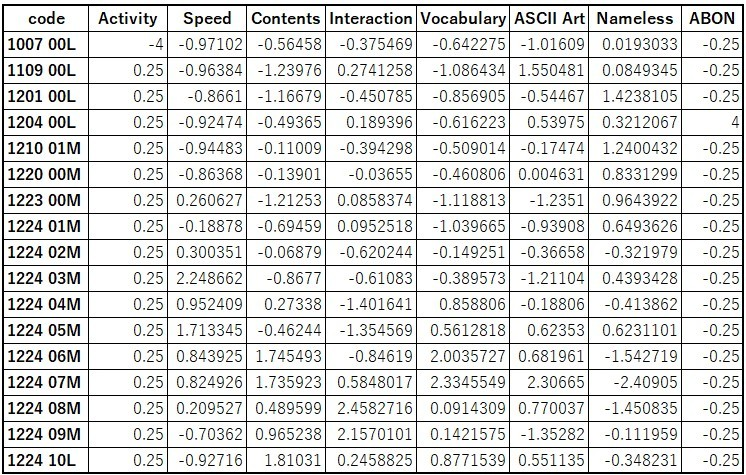

伊藤（2005）で示されていた「議論発散傾向」と「議論深化傾向」の推移をそれぞれ復元した図は以下の通り。

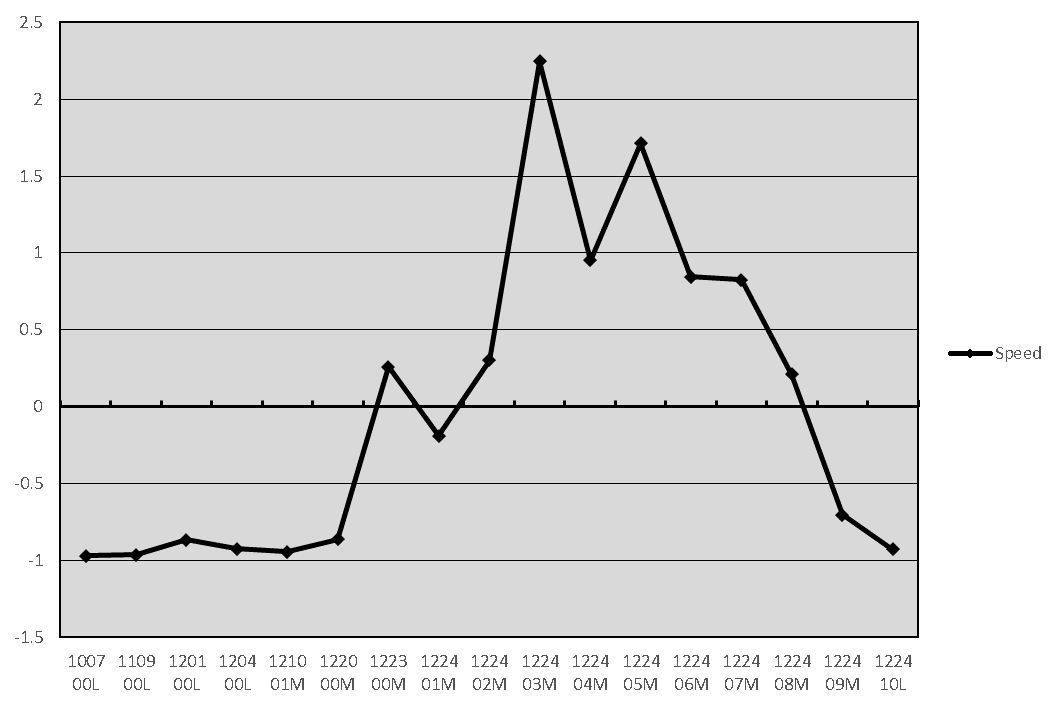

↑ 図1  「吉野家祭り」の議論発散傾向の推移

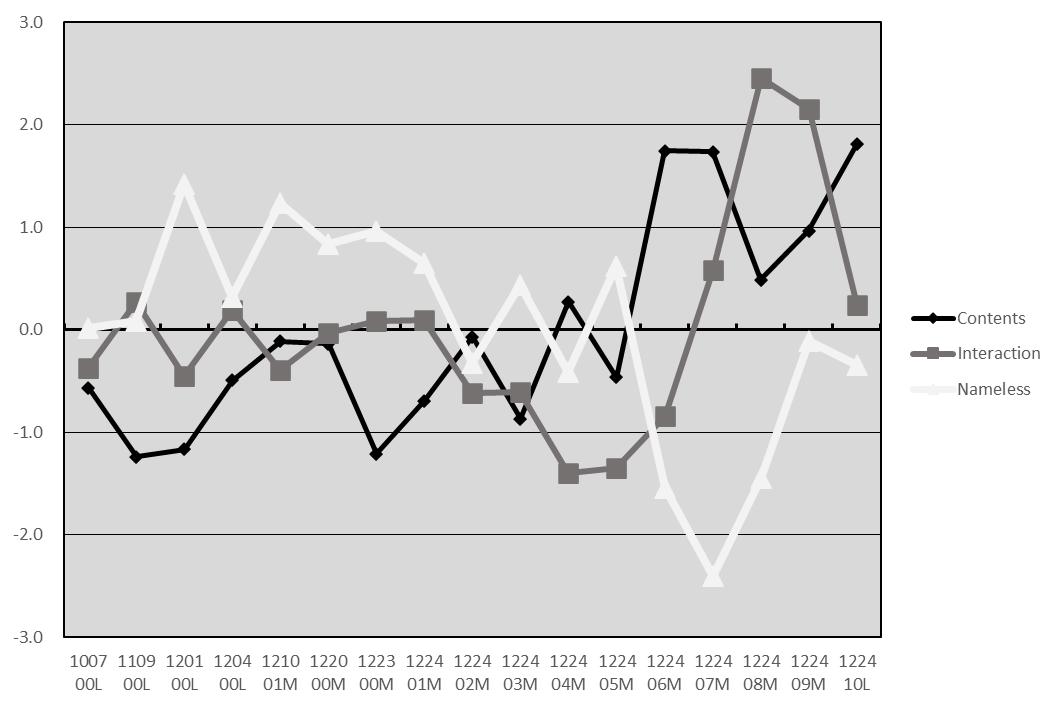

↑ 図2  「吉野家祭り」の議論深化傾向の推移